In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor,StackingRegressor
from xgboost import XGBRFRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [218]:
#to_get_ID=pd.read_csv('test.csv')

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [235]:
#submit=to_get_ID[['Id']]
submit_vr=to_get_ID[['Id']]

In [3]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [6]:
train_df.shape

(1460, 81)

In [7]:
train_df.dtypes[train_df.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

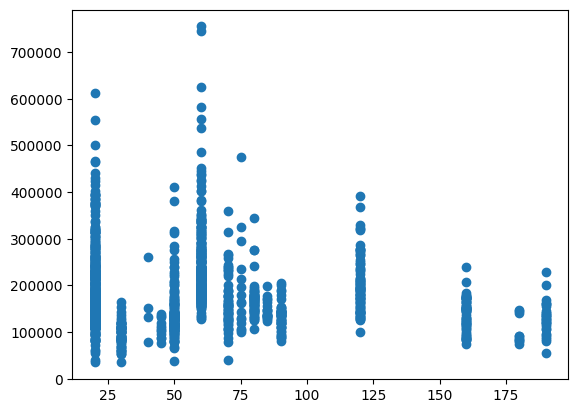

In [8]:
plt.scatter(x='MSSubClass',y='SalePrice',data=train_df)

In [9]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


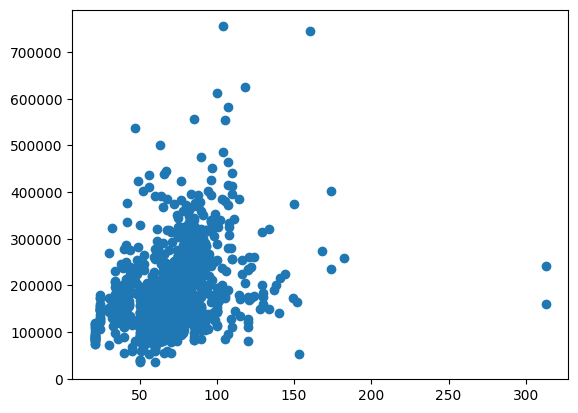

In [10]:
plt.scatter(x='LotFrontage',y='SalePrice',data=train_df)

In [11]:
train_df.query('LotFrontage >300 ')
#935 1299
#upper and my outliers 692 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


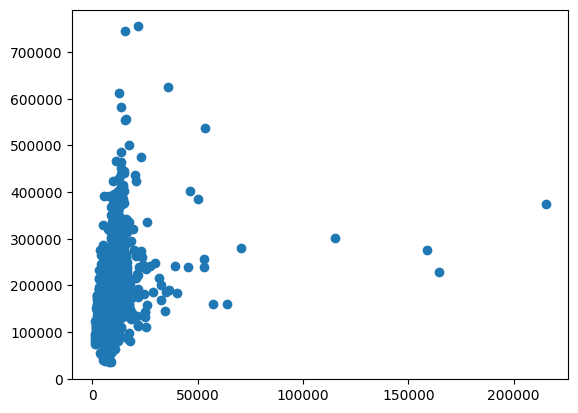

In [12]:
plt.scatter(x='LotArea',y='SalePrice',data=train_df)

In [13]:
train_df.query('LotArea > 55000')
#250 314 336 707 
#may be 452 1397

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [14]:
stats.zscore(train_df['LotArea']).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

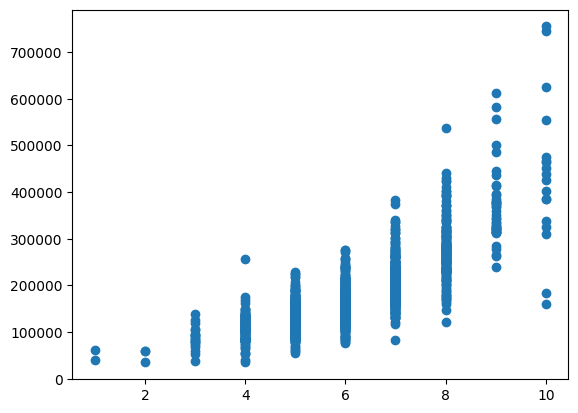

In [15]:
plt.scatter(x='OverallQual',y='SalePrice',data=train_df)
#692 1183 524 1299
#maybe 770

In [16]:
train_df.query('OverallQual == 8 & SalePrice >500000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000


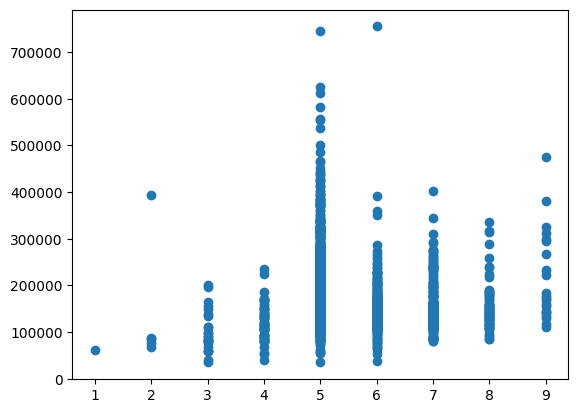

In [17]:
plt.scatter(x='OverallCond',y='SalePrice',data=train_df)
#379

In [18]:
train_df.query(' SalePrice > 700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


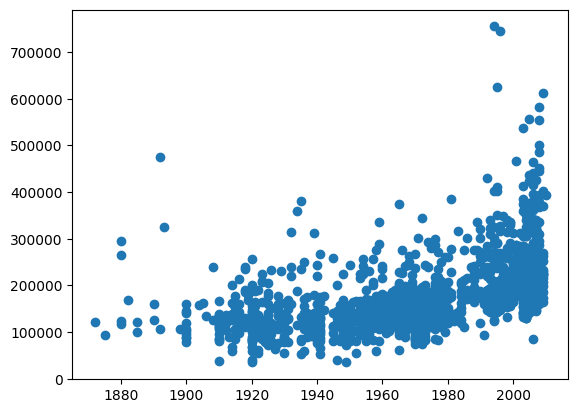

In [19]:
plt.scatter(x='YearBuilt',y='SalePrice',data=train_df)
#186

In [20]:
train_df.query('YearBuilt >1880 & YearBuilt <1900 & SalePrice >400000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


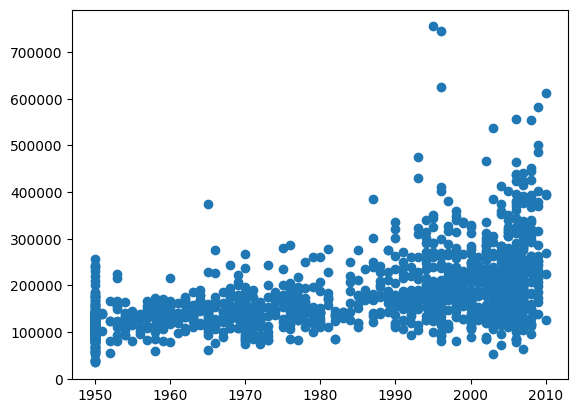

In [21]:
plt.scatter(x='YearRemodAdd',y='SalePrice',data=train_df)
#1170 314

In [22]:
train_df.query('YearRemodAdd < 1970 & SalePrice >300000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


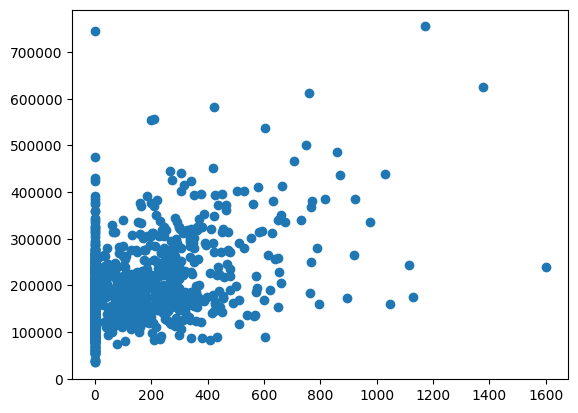

In [23]:
plt.scatter(x='MasVnrArea',y='SalePrice',data=train_df)
#298 

In [24]:
train_df.query('MasVnrArea > 1200 ')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


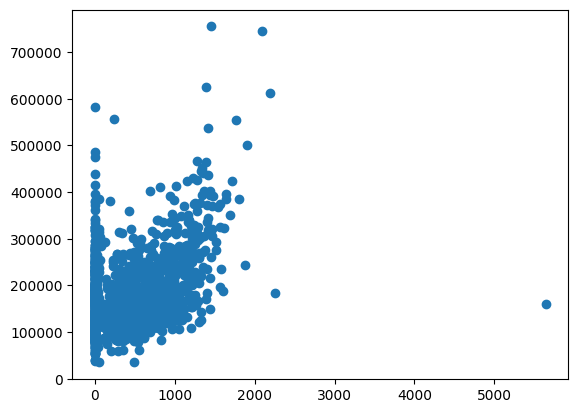

In [25]:
plt.scatter(x='BsmtFinSF1',y='SalePrice',data=train_df)
#1299

In [26]:
train_df.query('BsmtFinSF1 > 5000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


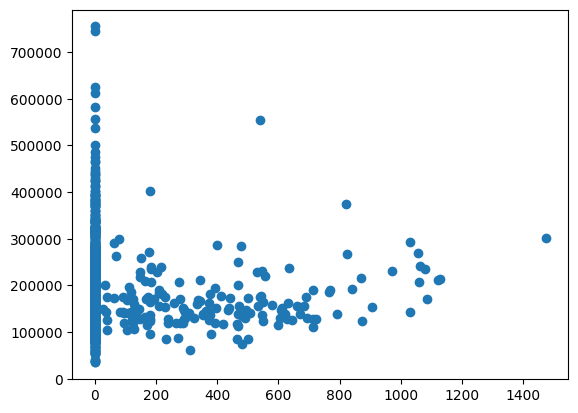

In [27]:
plt.scatter(x='BsmtFinSF2',y='SalePrice',data=train_df)
# 441

In [28]:
train_df.query('BsmtFinSF2 > 400 & SalePrice > 500000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


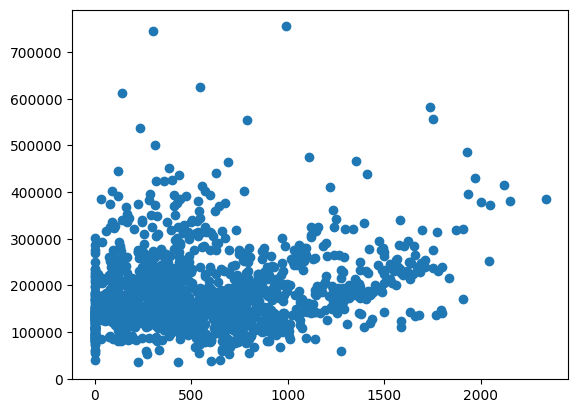

In [29]:
plt.scatter(x='BsmtUnfSF',y='SalePrice',data=train_df)

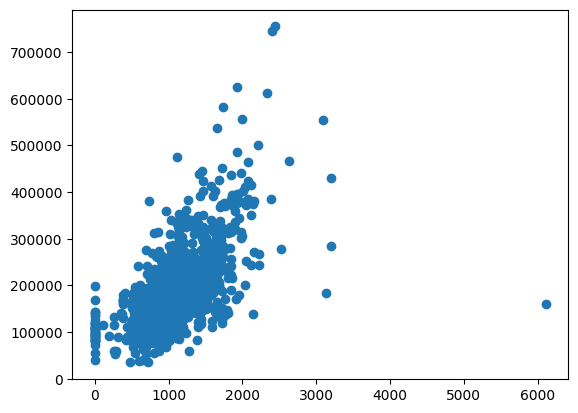

In [30]:
plt.scatter(x='TotalBsmtSF',y='SalePrice',data=train_df)

In [31]:
train_df.query('TotalBsmtSF > 5000 ')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


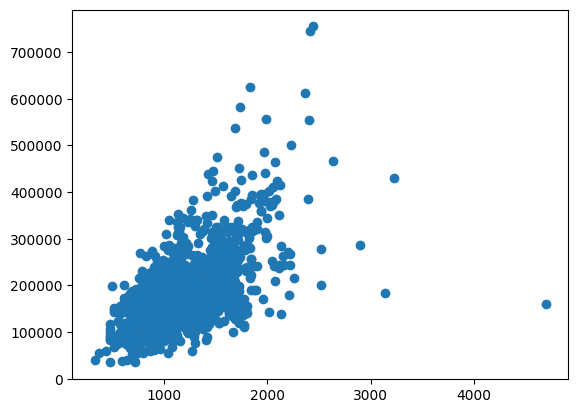

In [32]:
plt.scatter(x='1stFlrSF',y='SalePrice',data=train_df)
#1299

In [33]:
train_df[train_df['1stFlrSF']>3000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
496,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


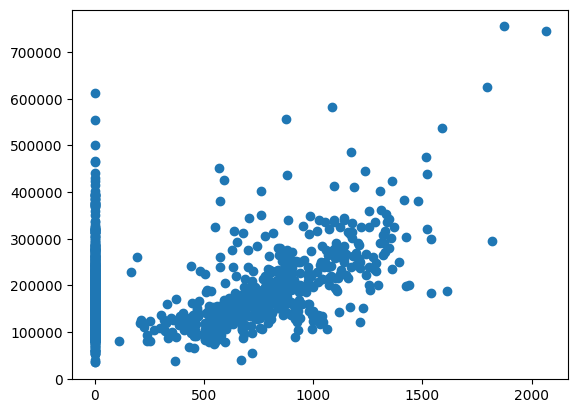

In [34]:
plt.scatter(x='2ndFlrSF',y='SalePrice',data=train_df)

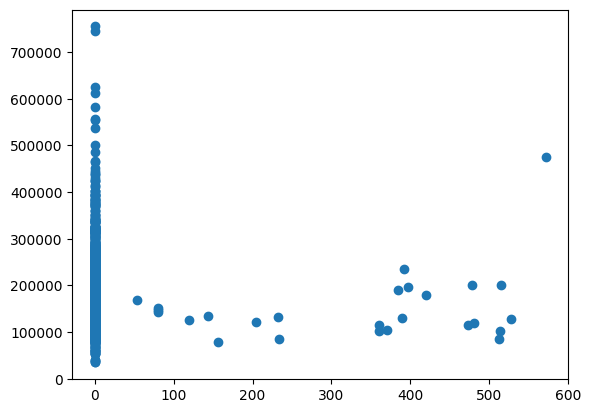

In [35]:
plt.scatter(x='LowQualFinSF',y='SalePrice',data=train_df)
#186

In [36]:
train_df.query('LowQualFinSF > 500 & SalePrice > 400000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


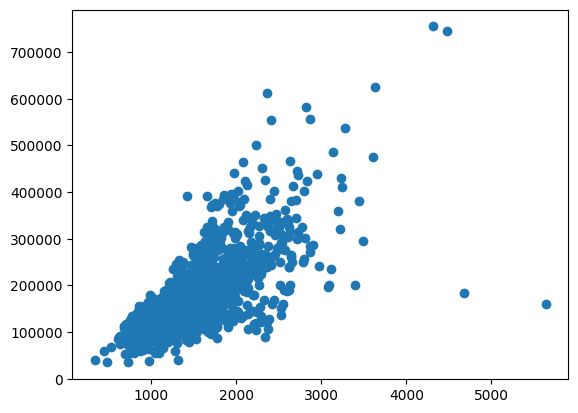

In [37]:
plt.scatter(x='GrLivArea',y='SalePrice',data=train_df)
#524

In [38]:
train_df.query('GrLivArea > 4000 & SalePrice < 300000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


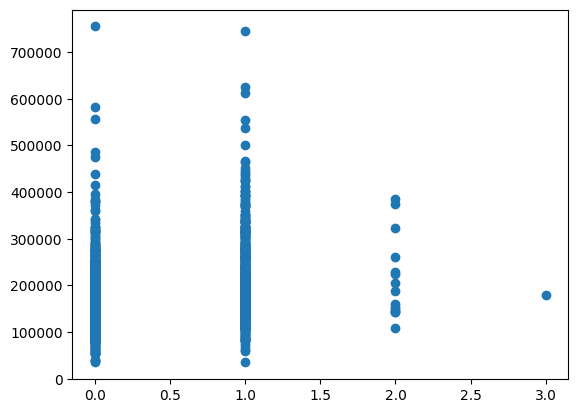

In [39]:
plt.scatter(x='BsmtFullBath',y='SalePrice',data=train_df)
#739

In [40]:
train_df.query('BsmtFullBath== 3')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


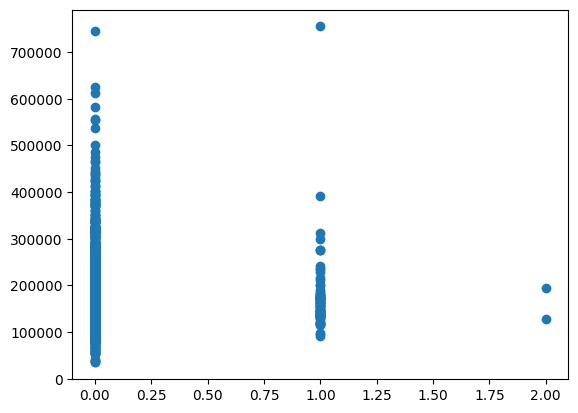

In [41]:
plt.scatter(x='BsmtHalfBath',y='SalePrice',data=train_df)
#598 955

In [42]:
stats.zscore(train_df['BsmtHalfBath']).sort_values()

0      -0.241061
965    -0.241061
964    -0.241061
963    -0.241061
962    -0.241061
          ...   
1006    3.948809
249     3.948809
358     3.948809
597     8.138680
954     8.138680
Name: BsmtHalfBath, Length: 1460, dtype: float64

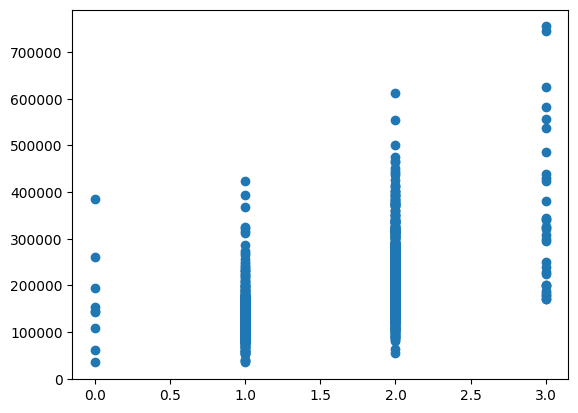

In [43]:
plt.scatter(x='FullBath',y='SalePrice',data=train_df)

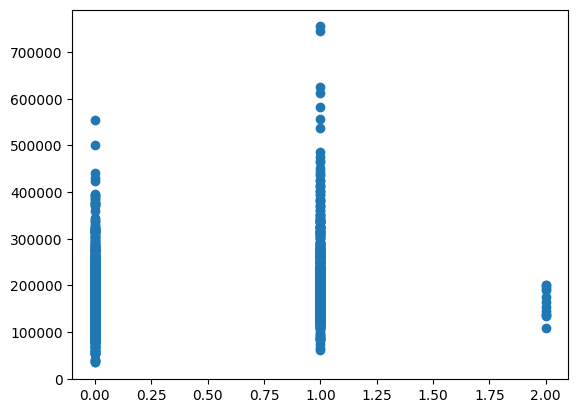

In [44]:
plt.scatter(x='HalfBath',y='SalePrice',data=train_df)

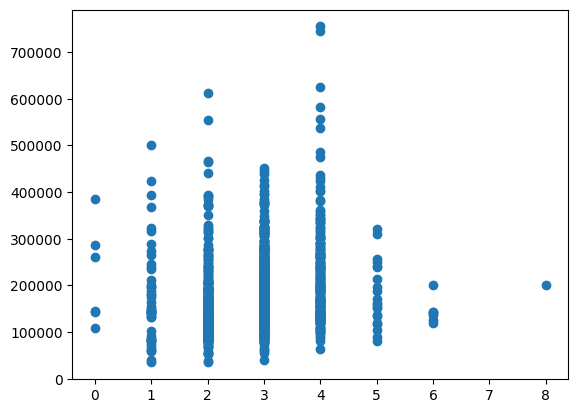

In [45]:
plt.scatter(x='BedroomAbvGr',y='SalePrice',data=train_df)
#636

In [46]:
stats.zscore(train_df['BedroomAbvGr']).sort_values()

1163   -3.514952
1213   -3.514952
634    -3.514952
1270   -3.514952
53     -3.514952
          ...   
144     3.842510
291     3.842510
897     3.842510
330     3.842510
635     6.294997
Name: BedroomAbvGr, Length: 1460, dtype: float64

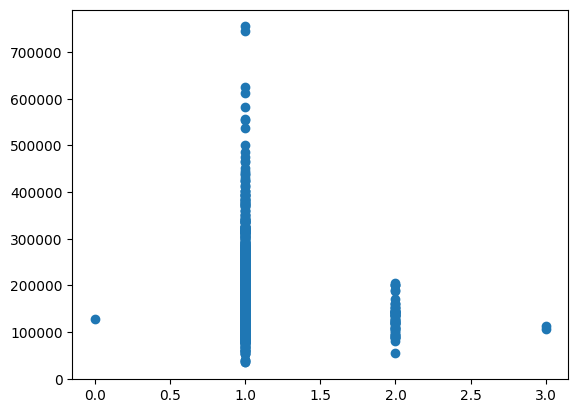

In [47]:
plt.scatter(x='KitchenAbvGr',y='SalePrice',data=train_df)
#49 810 955

In [48]:
train_df.query('KitchenAbvGr == 0')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


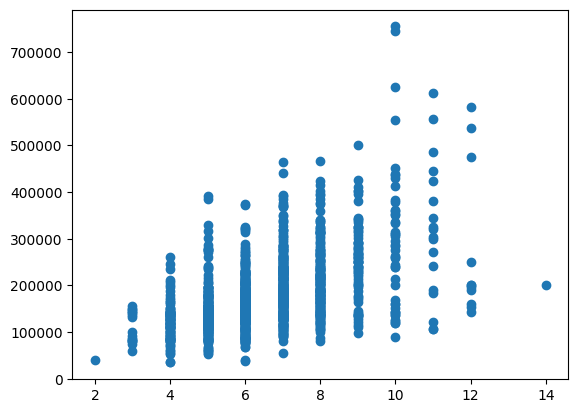

In [49]:
plt.scatter(x='TotRmsAbvGrd',y='SalePrice',data=train_df)
#636

In [50]:
train_df.query('TotRmsAbvGrd == 14')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


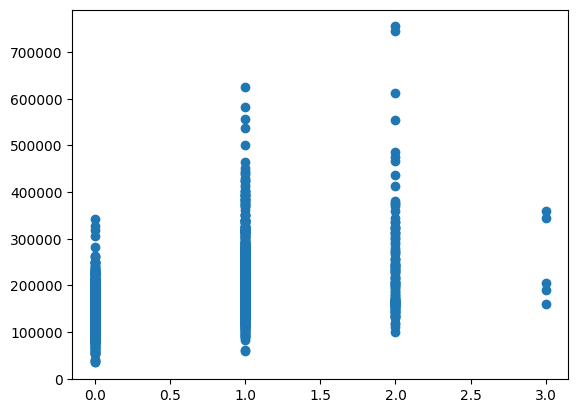

In [51]:
plt.scatter(x='Fireplaces',y='SalePrice',data=train_df)

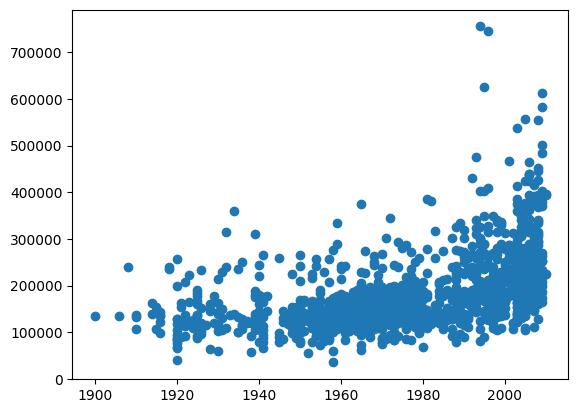

In [52]:
plt.scatter(x='GarageYrBlt',y='SalePrice',data=train_df)

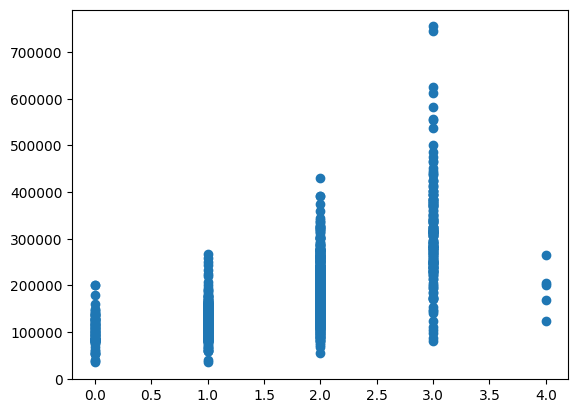

In [53]:
plt.scatter(x='GarageCars',y='SalePrice',data=train_df)

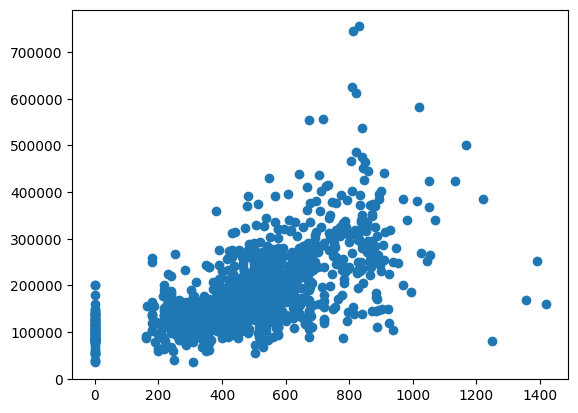

In [54]:
plt.scatter(x='GarageArea',y='SalePrice',data=train_df)
#582 1062 1191

In [55]:
train_df.query('GarageArea > 1200')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


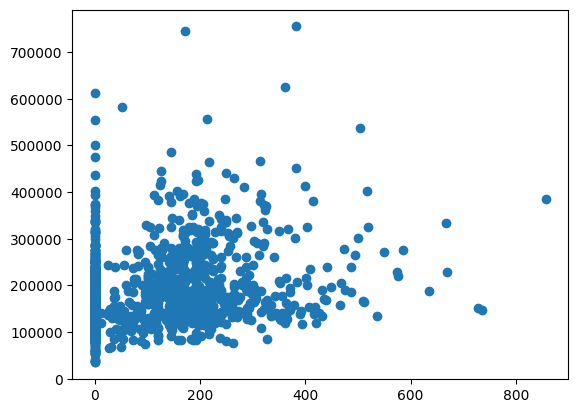

In [56]:
plt.scatter(x='WoodDeckSF',y='SalePrice',data=train_df)
#54

In [57]:
train_df.query('WoodDeckSF > 800')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000


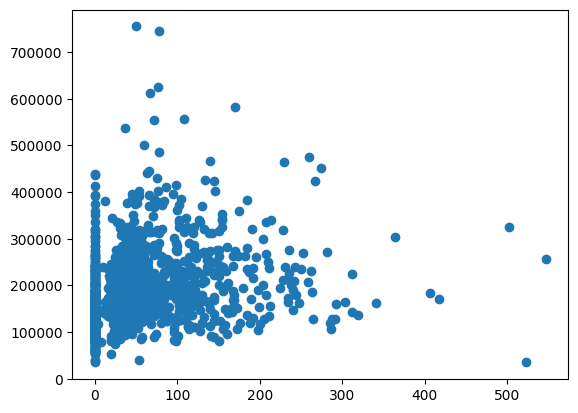

In [58]:
plt.scatter(x='OpenPorchSF',y='SalePrice',data=train_df)
#496 584 1329

In [59]:
train_df.query('OpenPorchSF > 450')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


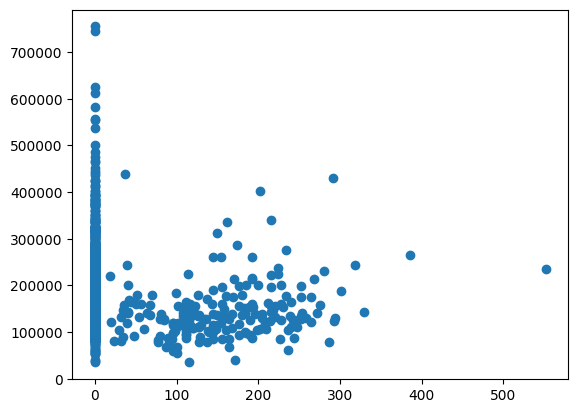

In [60]:
plt.scatter(x='EnclosedPorch',y='SalePrice',data=train_df)
#198

In [61]:
train_df.query('EnclosedPorch > 500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


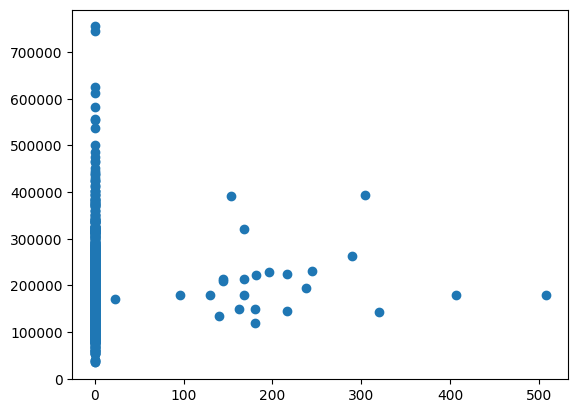

In [62]:
plt.scatter(x='3SsnPorch',y='SalePrice',data=train_df)
#206

In [63]:
train_df[train_df['3SsnPorch']>500]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
205,206,20,RL,99.0,11851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,180500


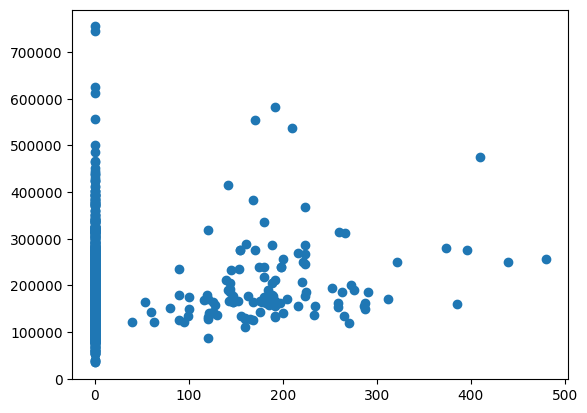

In [64]:
plt.scatter(x='ScreenPorch',y='SalePrice',data=train_df)
#maybe 186

In [65]:
train_df.query('ScreenPorch > 400 & SalePrice > 400000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


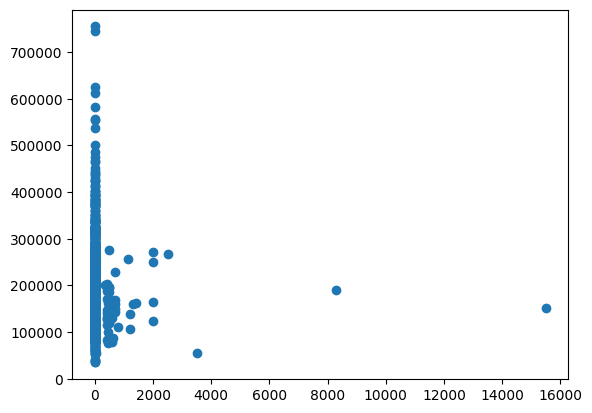

In [66]:
plt.scatter(x='MiscVal',y='SalePrice',data=train_df)
#347 1231

In [67]:
train_df.query('MiscVal > 8000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
346,347,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal,151500
1230,1231,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal,190000


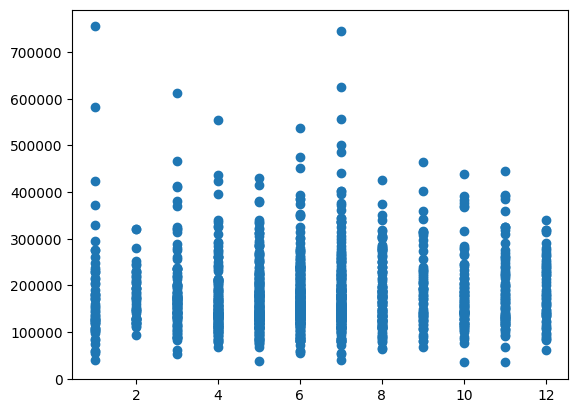

In [68]:
plt.scatter(x='MoSold',y='SalePrice',data=train_df)

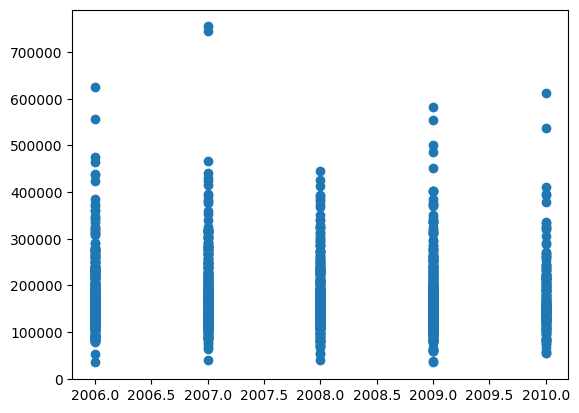

In [69]:
plt.scatter(x='YrSold',y='SalePrice',data=train_df)

In [70]:
outliers=[49, 54, 186, 198, 206, 250, 298, 314, 336, 347, 379, 441, 496, 524, 582, 584, 598, 636, 692, 707, 739, 810, 935, 955, 1062, 1170, 1183, 1191, 1231, 1299, 1329]

In [71]:
train_df=train_df[train_df.Id.isin(outliers)==False]

In [72]:
train_df.shape

(1429, 81)

Dealing with NULL values

In [73]:
train_df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1425
MiscFeature     1381
Alley           1341
Fence           1154
MasVnrType       854
FireplaceQu      681
LotFrontage      253
GarageYrBlt       76
GarageCond        76
GarageType        76
GarageFinish      76
GarageQual        76
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [74]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [75]:
train_df['Alley'].fillna('No',inplace=True);
test_df['Alley'].fillna('No',inplace=True);

C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\2644489584.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Alley'].fillna('No',inplace=True);
C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\2644489584.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

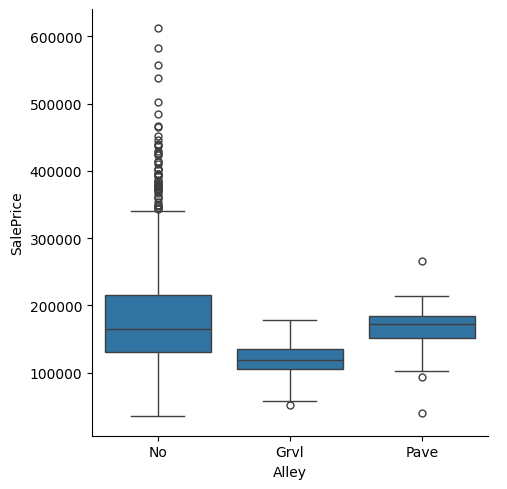

In [76]:
sns.catplot(data=train_df,x='Alley',y='SalePrice',kind='box')

In [77]:
train_df.query('Alley =="Pave"').count()

Id               39
MSSubClass       39
MSZoning         39
LotFrontage      37
LotArea          39
                 ..
MoSold           39
YrSold           39
SaleType         39
SaleCondition    39
SalePrice        39
Length: 81, dtype: int64

In [78]:
train_df['Fence'].fillna('No',inplace=True)

C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\1365374939.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Fence'].fillna('No',inplace=True)


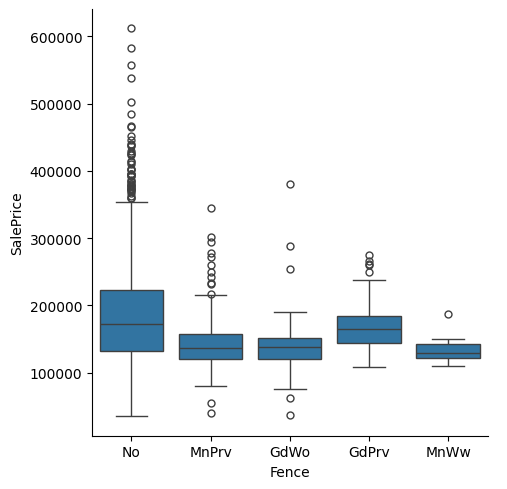

In [79]:
sns.catplot(x='Fence',y='SalePrice',data=train_df,kind='box')

In [80]:
test_df['Fence'].fillna('No',inplace=True)

C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\1646371440.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fence'].fillna('No',inplace=True)


In [81]:
train_df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1425
MiscFeature     1381
MasVnrType       854
FireplaceQu      681
LotFrontage      253
GarageFinish      76
GarageType        76
GarageYrBlt       76
GarageQual        76
GarageCond        76
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
KitchenQual        0
KitchenAbvGr       0
TotRmsAbvGrd       0
dtype: int64

In [82]:
train_df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [83]:
train_df['MasVnrType'].fillna('No',inplace = True)
test_df['MasVnrType'].fillna('No',inplace=True)

C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\2367662421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrType'].fillna('No',inplace = True)
C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\2367662421.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

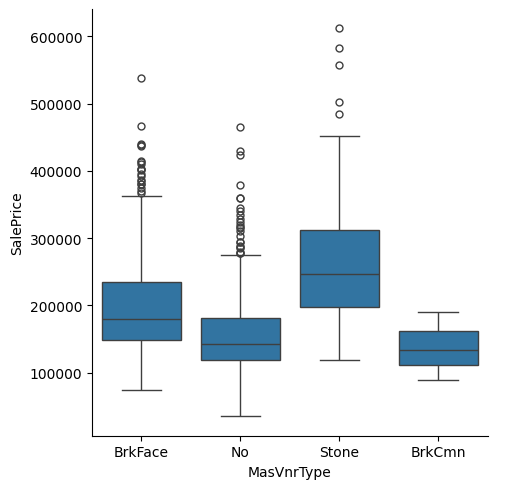

In [84]:
sns.catplot(x='MasVnrType',y='SalePrice',data=train_df,kind='box')

In [85]:
train_df['MasVnrArea'].fillna(0,inplace=True)
test_df['MasVnrArea'].fillna(0,inplace=True)

C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\2498760478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(0,inplace=True)
C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\2498760478.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [86]:
train_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [87]:
train_df['FireplaceQu'].fillna('No',inplace=True)
test_df['FireplaceQu'].fillna('No',inplace=True)

C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\1670826699.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['FireplaceQu'].fillna('No',inplace=True)
C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\1670826699.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

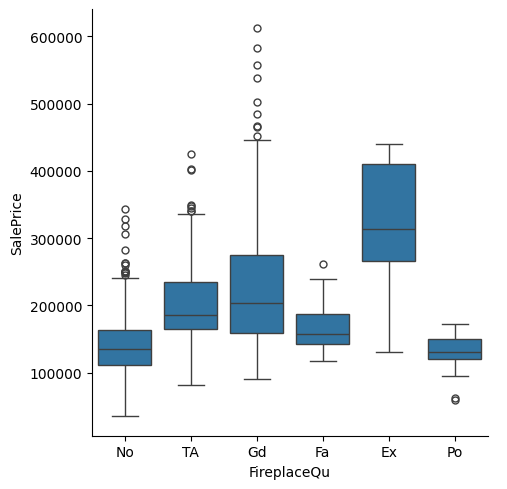

In [88]:
sns.catplot(x='FireplaceQu',y='SalePrice',data=train_df,kind='box')

In [89]:
train_df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  52., 100.,  24.,  89.,  63.,  76.,  81.,
        95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79.,  67.,  83.,  43.,
       103., 174.,  93.,  30., 129., 140.,  35.,  37., 118.,  87., 116.,
       111.,  99.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38., 109.,
       130.,  53., 137.,  45., 106.,  42.,  39., 104., 144., 114., 128.,
       149., 168., 182., 138., 152., 124., 153.,  46.])

In [90]:
train_df['LotFrontage'].fillna(0,inplace=True)
test_df['LotFrontage'].fillna(0,inplace=True)

C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\2469193268.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LotFrontage'].fillna(0,inplace=True)
C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\2469193268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [91]:
train_df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [92]:
train_df['GarageType'].fillna('No',inplace=True)
test_df['GarageType'].fillna('No',inplace=True)

C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\2396956490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageType'].fillna('No',inplace=True)
C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\2396956490.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [93]:
train_df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1964., 1999., 1935., 1990., 1945., 1987., 1989., 1915.,
       1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900., 1979.,
       1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926., 1955.,
       1981., 1986., 1988., 1916., 1932., 1972., 1980., 1924., 1996.,
       1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925., 1941.,
       1927., 1918., 1947., 1937., 1942., 1938., 1952., 1928., 1922.,
       1934., 1906., 1914., 2010., 1946., 1908., 1929., 1933.])

In [94]:
train_df['GarageQual'].fillna('No',inplace=True)
test_df['GarageQual'].fillna('No',inplace=True)

C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\4046941688.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageQual'].fillna('No',inplace=True)
C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\4046941688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

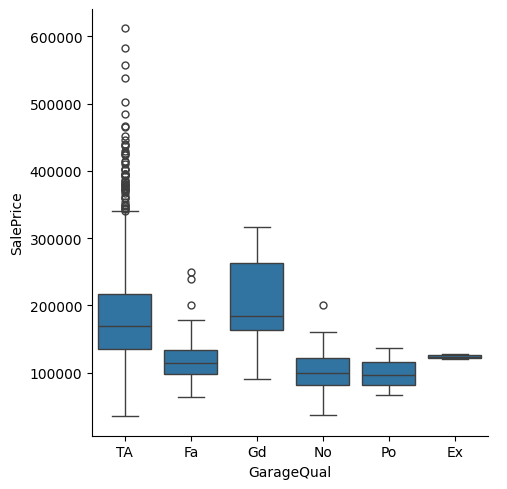

In [95]:
sns.catplot(x='GarageQual',y='SalePrice',data=train_df,kind='box')

In [96]:
train_df['BsmtFinType2'].fillna('Unf',inplace=True)
test_df['BsmtFinType2'].fillna('Unf',inplace=True)

C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\1235120148.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType2'].fillna('Unf',inplace=True)
C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\1235120148.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

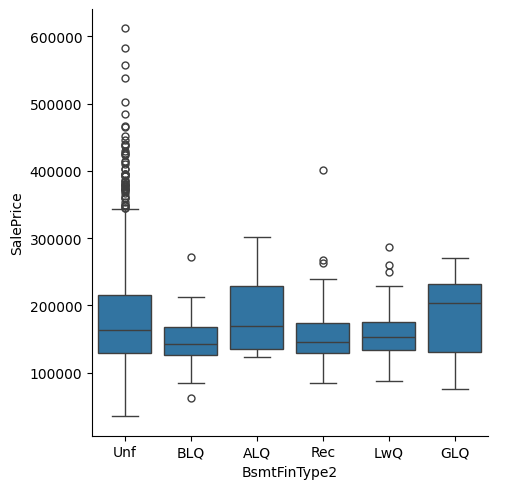

In [97]:
sns.catplot(x='BsmtFinType2',y='SalePrice',data=train_df,kind='box')

In [98]:
train_df['BsmtExposure'].fillna('No',inplace=True)
test_df['BsmtExposure'].fillna('No',inplace=True)

C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\2134669793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtExposure'].fillna('No',inplace=True)
C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\2134669793.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

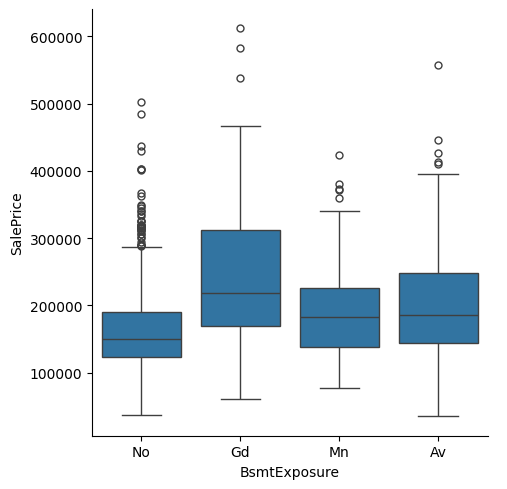

In [99]:
sns.catplot(x='BsmtExposure',y='SalePrice',data=train_df,kind='box')

In [100]:
train_df['BsmtCond'].fillna('No',inplace=True)
test_df['BsmtCond'].fillna('No',inplace=True)

C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\2042814062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtCond'].fillna('No',inplace=True)
C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\2042814062.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [101]:
train_df['BsmtQual'].fillna('No',inplace=True)
test_df['BsmtQual'].fillna('No',inplace=True)

C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\3798412020.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtQual'].fillna('No',inplace=True)
C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\3798412020.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [102]:
train_df['GarageFinish'].fillna('No',inplace=True)
test_df['GarageFinish'].fillna('No',inplace=True)

C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\1995105470.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageFinish'].fillna('No',inplace=True)
C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\1995105470.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [103]:
train_df.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          1425
MiscFeature     1381
GarageCond        76
GarageYrBlt       76
BsmtFinType1      37
Electrical         1
BedroomAbvGr       0
FireplaceQu        0
Fireplaces         0
Functional         0
dtype: int64

In [104]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

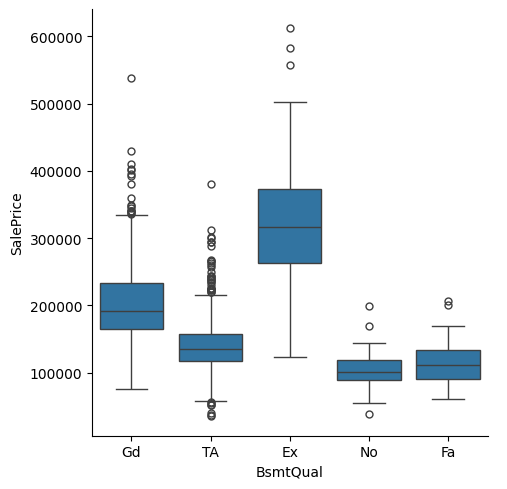

In [105]:
sns.catplot(x='BsmtQual',y='SalePrice',data=train_df,kind='box')

In [106]:
train_df['BsmtFinType1'].fillna('Unf',inplace=True)
test_df['BsmtFinType1'].fillna('Unf',inplace=True)

C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\1507099269.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType1'].fillna('Unf',inplace=True)
C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\1507099269.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

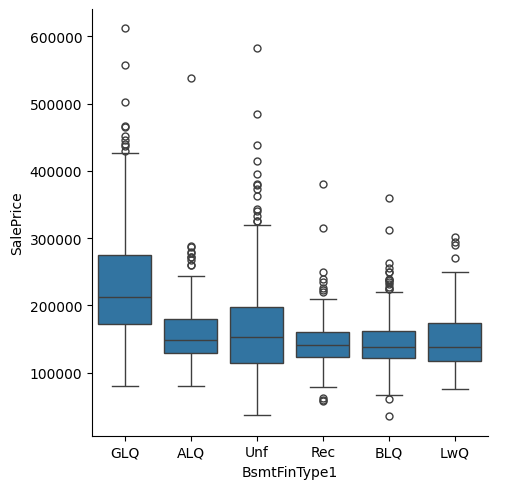

In [107]:
sns.catplot(x='BsmtFinType1',y='SalePrice',data=train_df,kind='box')

In [108]:
train_df['Electrical'].fillna('SBrkr',inplace=True)
test_df['Electrical'].fillna('SBrkr',inplace=True)


C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\3242135233.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Electrical'].fillna('SBrkr',inplace=True)
C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\3242135233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [109]:
train_df=train_df.drop(columns=['GarageCond','BsmtFinType2'])
test_df=test_df.drop(columns=['GarageCond','BsmtFinType2'])

In [110]:
test_df.shape

(1459, 78)

In [111]:
train_df['BsmtFinSF1'].head(10)

0     706
1     978
2     486
3     216
4     655
5     732
6    1369
7     859
8       0
9     851
Name: BsmtFinSF1, dtype: int64

In [112]:
train_df['BsmtFinSF2'].head(10)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7    32
8     0
9     0
Name: BsmtFinSF2, dtype: int64

In [113]:
train_df['BsmtUnfSF'].head(10)

0    150
1    284
2    434
3    540
4    490
5     64
6    317
7    216
8    952
9    140
Name: BsmtUnfSF, dtype: int64

In [114]:
train_df['TotalBsmtSF'].head(10)

0     856
1    1262
2     920
3     756
4    1145
5     796
6    1686
7    1107
8     952
9     991
Name: TotalBsmtSF, dtype: int64

In [115]:
#feature engineering

In [116]:
train_df['houseage']=train_df['YrSold']-train_df['YearBuilt']
test_df['houseage']=test_df['YrSold']-test_df['YearBuilt']

In [117]:
train_df['houseremodelage']=train_df['YrSold']-train_df['YearRemodAdd']
test_df['houseremodelage']=test_df['YrSold']-test_df['YearRemodAdd']

In [118]:
train_df['totalsf']=train_df['1stFlrSF']+train_df['2ndFlrSF']+train_df['TotalBsmtSF']
test_df['totalsf']=test_df['1stFlrSF']+test_df['2ndFlrSF']+test_df['TotalBsmtSF']

In [119]:
train_df['totalarea']=train_df['TotalBsmtSF']+train_df['GrLivArea']
test_df['totalarea']=test_df['TotalBsmtSF']+test_df['GrLivArea']

In [120]:
train_df['totalbaths']=train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5*(train_df['BsmtHalfBath'] + train_df['HalfBath'] )
test_df['totalbaths']=test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5*(test_df['BsmtHalfBath'] + test_df['HalfBath'] )

In [121]:
train_df['totalporchsf']= train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + train_df['3SsnPorch'] +train_df['ScreenPorch']
test_df['totalporchsf']= test_df['OpenPorchSF'] + test_df['EnclosedPorch'] + test_df['3SsnPorch'] +test_df['ScreenPorch']

In [217]:
train_df=train_df.drop(columns=['YrSold','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','TotalBsmtSF','GrLivArea','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','Id'])
test_df=test_df.drop(columns=['YrSold','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','TotalBsmtSF','GrLivArea','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','Id'])

KeyError: "['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Id'] not found in axis"

In [123]:
correlation_matrix=train_df.corr(numeric_only=True)

<Axes: >

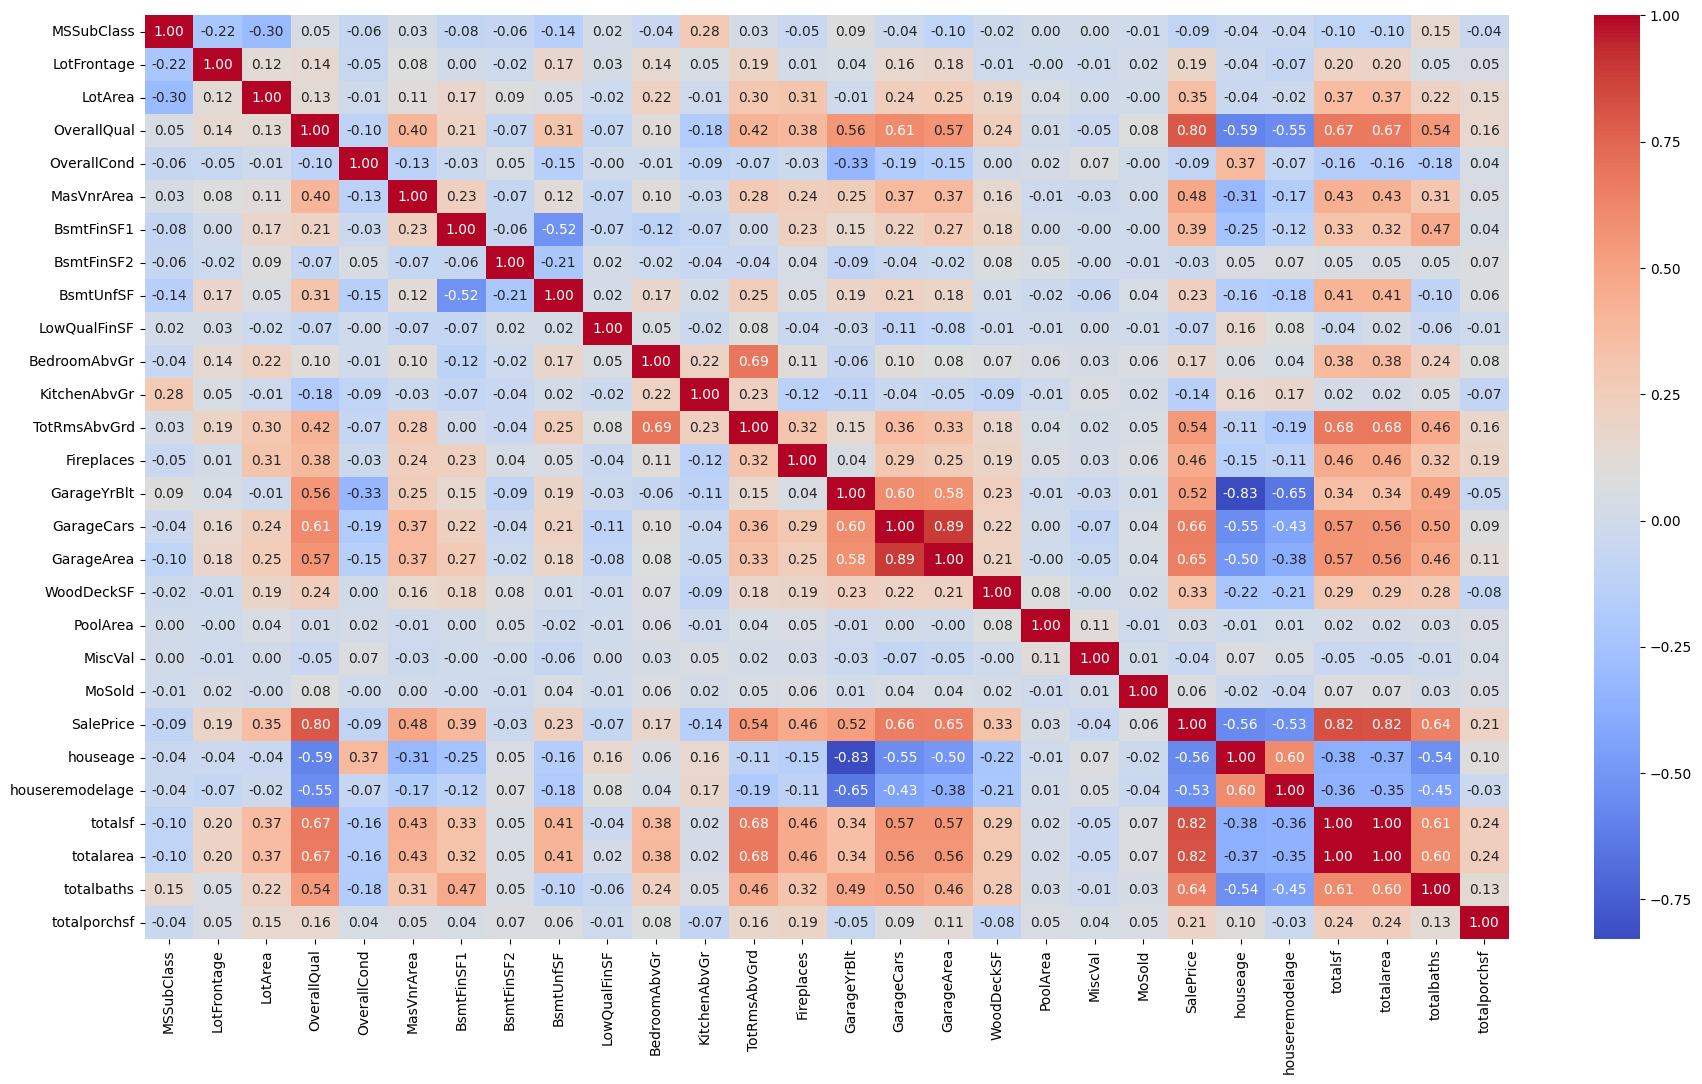

In [124]:
plt.figure(figsize=(22,12))
sns.heatmap(correlation_matrix, annot=True, cmap ='coolwarm',fmt=".2f")

In [125]:
#drop houseage or garageyrblt \\ garagearea or garagecars

In [126]:
train_df=train_df.drop(columns=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'])
test_df=test_df.drop(columns=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'])

In [127]:
train_df=train_df.drop(columns=['GarageYrBlt','GarageArea'])
test_df=test_df.drop(columns=['GarageYrBlt','GarageArea'])

In [128]:
test_df.shape

(1459, 63)

<Axes: xlabel='SalePrice', ylabel='Count'>

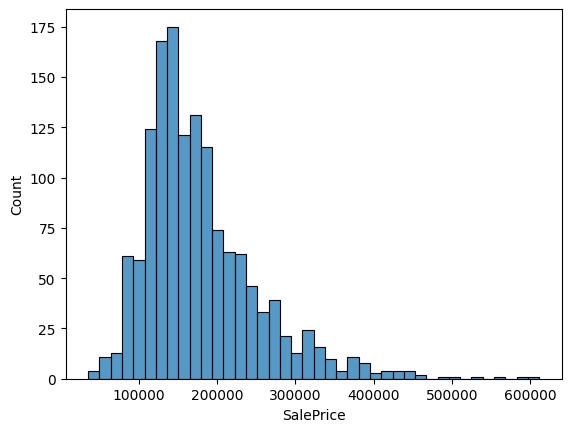

In [129]:
sns.histplot(train_df,x=train_df['SalePrice'])

In [130]:
train_df['SalePrice']=np.log1p(train_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

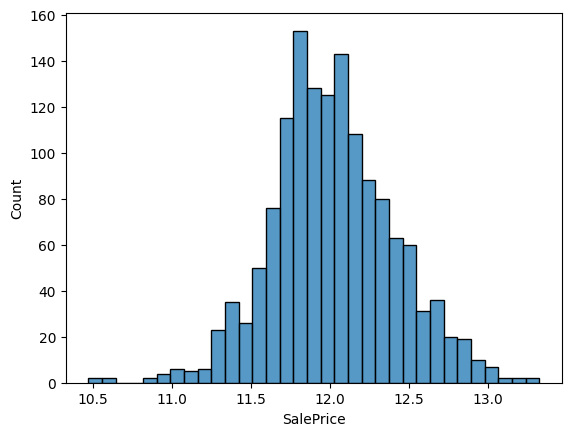

In [131]:
sns.histplot(train_df,x=train_df['SalePrice'])

In [132]:
train_df=train_df.drop(columns=['PoolQC','MiscFeature','Alley','Fence'])
test_df=test_df.drop(columns=['PoolQC','MiscFeature','Alley','Fence'])

In [133]:
test_df.isnull().sum().sort_values(ascending=False).head(20)

MSZoning        4
totalbaths      2
Functional      2
Utilities       2
SaleType        1
Exterior1st     1
GarageCars      1
KitchenQual     1
Exterior2nd     1
totalsf         1
totalarea       1
BedroomAbvGr    0
KitchenAbvGr    0
LowQualFinSF    0
TotRmsAbvGrd    0
Fireplaces      0
FireplaceQu     0
MSSubClass      0
GarageQual      0
GarageType      0
dtype: int64

In [134]:
train_df.dtypes[train_df.dtypes=='object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [135]:
train_df.dtypes[train_df.dtypes!='object']

MSSubClass           int64
LotFrontage        float64
LotArea              int64
OverallQual          int64
OverallCond          int64
MasVnrArea         float64
LowQualFinSF         int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageCars           int64
WoodDeckSF           int64
PoolArea             int64
MiscVal              int64
MoSold               int64
SalePrice          float64
houseage             int64
houseremodelage      int64
totalsf              int64
totalarea            int64
totalbaths         float64
totalporchsf         int64
dtype: object

In [136]:
#pipelines

In [137]:
ode_cols=['LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','HeatingQC','CentralAir','KitchenQual',
          'Functional','FireplaceQu','GarageFinish','GarageQual','PavedDrive']

In [138]:
ohe_cols=['MSZoning','Street','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','Exterior1st',
          'Exterior2nd','MasVnrType','Foundation','Heating','LotConfig',
          'Electrical','GarageType','SaleType','SaleCondition','RoofMatl']

In [139]:
num_cols=train_df.select_dtypes(include=['int64','float64']).columns
num_cols=num_cols.drop('SalePrice')

In [140]:
 num_pipeline=Pipeline(steps=[
     ('impute',SimpleImputer(strategy='mean')),
     ('scaler',StandardScaler())
 ])

In [141]:
ode_pipeline=Pipeline(steps=[
    ('imute',SimpleImputer(strategy='most_frequent')),
    ('ode',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))
])

In [142]:
ohe_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

In [143]:
col_trans=ColumnTransformer(transformers=[
    ('num_trans',num_pipeline,num_cols),
    ('ode_trans',ode_pipeline,ode_cols),
    ('ohe_trans',ohe_pipeline,ohe_cols),],
        remainder='passthrough',
                           n_jobs=-1)

In [144]:
pipeline=Pipeline(steps=[
    ('preprocessing',col_trans)
])

In [145]:
X=train_df.drop('SalePrice',axis=1)
y=train_df['SalePrice']

In [146]:
X_preprocessed=pipeline.fit_transform(X)

In [147]:
x_train,x_test,y_train,y_test=train_test_split(X_preprocessed,y,test_size=0.2,random_state=42)

In [148]:
#models

In [149]:
lr=LinearRegression()

In [150]:
lr.fit(x_train,y_train)

LinearRegression()

In [151]:
y_pred_lr=lr.predict(x_test)

In [152]:
mean_squared_error(y_test,y_pred_lr)

5.813928307369293e+17

In [153]:

RFR=RandomForestRegressor(random_state=42)

In [154]:
param_grid_rfr={
    'max_depth':[5,10,15],
    'n_estimators':[100,250,500],
    'min_samples_split':[3,5,10]
}

In [155]:
rfr_cv=GridSearchCV(RFR,param_grid_rfr,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

In [156]:
rfr_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [157]:
y_pred_rfr=rfr_cv.predict(x_test)

In [158]:
mean_squared_error(y_test,y_pred_rfr)

0.017646012462441414

In [159]:
np.sqrt(-1*rfr_cv.best_score_)

0.13534644238589566

In [160]:
XGB=XGBRFRegressor(random_state=42)

In [161]:
param_grid_xgb={
    'learning_rate':[0.05,0.1,0.2],
    'n_estimators':[300,400],
    'max_depth':[3,5],
    'min_child_weight':[1,2,3],
    'gamma':[0,0.1,0.2],
    'subsample':[0.8,0.9,1.0],
    'colsample':[0.8,0.9,1.0]
}

In [162]:
xgb_cv=GridSearchCV(XGB,param_grid_xgb,cv=3,scoring='neg_mean_squared_error',n_jobs=-1)

In [163]:
xgb_cv.fit(x_train,y_train)

C:\Users\alubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_cat_threshold=None,
                                      max_...
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      random_state=42, reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'colsample': [0.8, 0.9, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 5],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [300, 400],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [164]:
y_pred_xgb=xgb_cv.predict(x_test)

In [165]:
mean_squared_error(y_test,y_pred_xgb)

0.10484183942138764

In [166]:
np.sqrt(-1*xgb_cv.best_score_)

0.32802461332172234

In [167]:
#0.3335636022668603

In [168]:
y_pred_xgb=xgb_cv.predict(x_test)

In [169]:
mean_squared_error(y_test,y_pred_xgb)

0.10484183942138764

In [170]:
ridge=Ridge()

In [171]:
param_grid_ridge={
    'alpha':[0.05,0.1,1,3,5,10],
    'solver':['auto','svd','cholsky','lsqr','sparse_cg','sag']
}

In [172]:
ridge_cv=GridSearchCV(ridge,param_grid_ridge,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

In [173]:
ridge_cv.fit(x_train,y_train)

C:\Users\alubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\alubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholsky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [174]:
np.sqrt(-1*ridge_cv.best_score_)

0.11323698927319932

In [175]:
GBR=GradientBoostingRegressor()

In [176]:
param_grid_GBR={
    'max_depth':[12,15,20],
    'n_estimators':[200,300,1000],
    'min_samples_leaf':[10,25,50],
    'learning_rate':[0.001,0.01,0.1],
    'max_features':[0.01,0.1,0.7]
}

In [177]:
GBR_cv=GridSearchCV(GBR,param_grid_GBR,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

In [178]:
GBR_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [12, 15, 20],
                         'max_features': [0.01, 0.1, 0.7],
                         'min_samples_leaf': [10, 25, 50],
                         'n_estimators': [200, 300, 1000]},
             scoring='neg_mean_squared_error')

In [179]:
np.sqrt(-1*GBR_cv.best_score_)

0.11550404135691553

In [180]:
lgbm_regressor=lgb.LGBMRegressor()

In [181]:
param_grid_lgbm={
    'boosting_type':['dart','gbdt'],
    'num_leaves':[20,30,40],
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':[100,200,300]
}

In [182]:
lgbm_cv=GridSearchCV(lgbm_regressor,param_grid_lgbm,cv=3,scoring='neg_mean_squared_error',n_jobs=-1)

In [183]:
lgbm_cv.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1742
[LightGBM] [Info] Number of data points in the train set: 1143, number of used features: 114
[LightGBM] [Info] Start training from score 12.017302


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['dart', 'gbdt'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 30, 40]},
             scoring='neg_mean_squared_error')

In [184]:
np.sqrt(-1*lgbm_cv.best_score_)

0.12547964746403123

In [185]:
#lr 5.8
#xgb 0.32802461332172234
#rfr 0.13534644238589566
#lgbm 0.12547964746403123
#gbr  0.11566937571196888
#ridge 0.11323698927319932


In [186]:
vr= VotingRegressor([
    ('gbr',GBR_cv.best_estimator_),
    ('xgb',xgb_cv.best_estimator_),
    ('ridge',ridge_cv.best_estimator_),
    ('rfr',rfr_cv.best_estimator_),
    ('lgbm',lgbm_cv.best_estimator_)],
    weights=[4,1,5,2,3])

In [187]:
vr.fit(x_train,y_train)

C:\Users\alubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:27:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1742
[LightGBM] [Info] Number of data points in the train set: 1143, number of used features: 114
[LightGBM] [Info] Start training from score 12.017302


VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=12,
                                                       max_features=0.1,
                                                       min_samples_leaf=10,
                                                       n_estimators=1000)),
                            ('xgb',
                             XGBRFRegressor(base_score=None, booster=None,
                                            callbacks=None, colsample=0.8,
                                            colsample_bylevel=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric...
                                            max_leaves=None, min_child_weight=2,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=400, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='reg:squarederror', ...)),
                            ('ridge', Ridge(alpha=10, solver='lsqr')),
                            ('rfr',
                             RandomForestRegressor(max_depth=15,
                                                   min_samples_split=5,
                                                   random_state=42)),
                            ('lgbm', LGBMRegressor(num_leaves=20))],
                weights=[4, 1, 5, 2, 3])

In [188]:
y_pred_vr=vr.predict(x_test)

In [189]:
mean_squared_error(y_test,y_pred_vr,squared=False)

C:\Users\alubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.11537274376443685

In [190]:
catboost=CatBoostRegressor(loss_function='RMSE',verbose=False)

In [191]:
param_grid_cat={
    'iterations':[100,200,1000],
    'depth':[4,6,8,10],
    'learning_rate':[0.01,0.05,0.1,0.5]
}

In [192]:
cat_cv=GridSearchCV(catboost,param_grid_cat,cv=3,scoring='neg_mean_squared_error',n_jobs=-1)

In [193]:
cat_cv.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001CF174D7A90>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 200, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [194]:
np.sqrt(-1*cat_cv.best_score_)

0.11682942316054938

In [195]:
estimators=[
    ('xgb',xgb_cv.best_estimator_),
    ('cat',cat_cv.best_estimator_),
    ('gbr',GBR_cv.best_estimator_),
    ('lgbm',lgbm_cv.best_estimator_),
    ('rfr',rfr_cv.best_estimator_)
]

In [196]:
stack_reg=StackingRegressor(
        estimators=estimators,
        final_estimator=vr
)

In [197]:
stack_reg.fit(x_train,y_train)

C:\Users\alubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1742
[LightGBM] [Info] Number of data points in the train set: 1143, number of used features: 114
[LightGBM] [Info] Start training from score 12.017302


C:\Users\alubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\alubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\alubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.w

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1636
[LightGBM] [Info] Number of data points in the train set: 914, number of used features: 106
[LightGBM] [Info] Start training from score 12.018400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1638
[LightGBM] [Info] Number of data points in the train set: 914, number of used features: 106
[LightGBM] [Info] Start training from score 12.017443
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

C:\Users\alubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1143, number of used features: 5
[LightGBM] [Info] Start training from score 12.017302


StackingRegressor(estimators=[('xgb',
                               XGBRFRegressor(base_score=None, booster=None,
                                              callbacks=None, colsample=0.8,
                                              colsample_bylevel=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.2, ma...
                                                                              max_leaves=None,
                                                                              min_child_weight=2,
                                                                              missing=nan,
                                                                              monotone_constraints=None,
                                                                              multi_strategy=None,
                                                                              n_estimators=400,
                                                                              n_jobs=None,
                                                                              num_parallel_tree=None,
                                                                              objective='reg:squarederror', ...)),
                                                              ('ridge',
                                                               Ridge(alpha=10,
                                                                     solver='lsqr')),
                                                              ('rfr',
                                                               RandomForestRegressor(max_depth=15,
                                                                                     min_samples_split=5,
                                                                                     random_state=42)),
                                                              ('lgbm',
                                                               LGBMRegressor(num_leaves=20))],
                                                  weights=[4, 1, 5, 2, 3]))

In [202]:
y_pred_meta=stack_reg.predict(x_test)

In [204]:
mean_squared_error(y_test,y_pred_meta,squared=False)

C:\Users\alubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.11652516780531894

In [206]:
test_df.isnull().sum().sort_values(ascending=False)

MSZoning           4
totalbaths         2
Functional         2
Utilities          2
SaleType           1
Exterior1st        1
GarageCars         1
KitchenQual        1
Exterior2nd        1
totalsf            1
totalarea          1
BedroomAbvGr       0
KitchenAbvGr       0
LowQualFinSF       0
TotRmsAbvGrd       0
Fireplaces         0
FireplaceQu        0
MSSubClass         0
GarageQual         0
GarageType         0
GarageFinish       0
CentralAir         0
PavedDrive         0
WoodDeckSF         0
PoolArea           0
MiscVal            0
MoSold             0
SaleCondition      0
houseage           0
houseremodelage    0
Electrical         0
BsmtFinType1       0
HeatingQC          0
HouseStyle         0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
OverallQual        0
Heating            0
OverallCond  

In [207]:
test_df_processed=pipeline.transform(test_df)

In [212]:
y_final_pred=stack_reg.predict(test_df_processed)

In [214]:
y_final_pred=np.exp(y_final_pred)

In [221]:
y_final_pred

array([123176.67765834, 162223.9312557 , 176560.86841853, ...,
       146846.06884612, 125879.27372292, 212505.48567095])

In [222]:

submit['SalePrice']=y_final_pred
submit.to_csv('House_stacking_prediction.csv',index=False)

ValueError: Length of values (286) does not match length of index (1459)

In [236]:
y_pred_vr_submit=np.exp(vr.predict(test_df_processed))

In [238]:

submit_vr['SalePrice']=y_pred_vr_submit
submit_vr.to_csv('House_vr_prediction.csv',index=False)

C:\Users\alubi\AppData\Local\Temp\ipykernel_20376\764861473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit_vr['SalePrice']=y_pred_vr_submit
